#  Fear Emotional Analysis in *Pet Sematary* and *The Shining*  
### Using a Custom Stephen-King-Inspired Fear Lexicon

This notebook extracts and visualizes **fear intensity** across the two novels using a **fully custom, manually-crafted fear lexicon** designed specifically for Stephen King’s writing style.

Why a custom lexicon?

- Horror fiction uses *atmospheric* fear (shadows, silence, cold)  
- Psychological fear appears through thoughts (madness, voices)  
- King frequently expresses fear through *family trauma*  
- Standard lexicons fail to cover these nuances  

This approach creates a **unique, original analysis** suited for your NLP project.


In [33]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Text Files


In [34]:
with open("PetSemetary_updated.txt", "r", encoding="utf-8", errors="ignore") as f:
    pet_text = f.read()

with open("TheShining_updated.txt", "r", encoding="utf-8", errors="ignore") as f:
    shining_text = f.read()

    print("Files loaded successfully.")

Files loaded successfully.


## Tokenize Text

We lowercase and tokenize the novels to make them easier to process.


In [35]:
pet_tokens = word_tokenize(pet_text.lower())
shining_tokens = word_tokenize(shining_text.lower())
print("Tokenization complete.")

Tokenization complete.


## Custom Fear Lexicon (Hand-Crafted)

This lexicon combines:
- **Core fear concepts**
- **Atmospheric/environmental triggers**
- **Psychological breakdown language**
- **Family trauma indicators** (common in King)

This allows deeper literary fear detection.


In [38]:
fear_words = {
   "fear", "terror", "horror", "dread", "panic", "nightmare",
    "scream", "cry", "trembling",

    # Environmental fear
    "dark", "darkness", "shadow", "shadows", "cold", "silence",
    "whisper", "creaking", "footsteps", "hallway", "basement",
    "attic", "room", "door", "window", "grave", "woods", "fog",

    # Psychological fear
    "madness", "insane", "insanity", "voices", "hallucination",
    "whispering", "paranoia", "breathing", "heartbeat",
    "shivering", "haunted", "ghost", "spirit",

    # Violence / death
    "blood", "dead", "corpse", "graveyard", "kill", "killing",
    "knife", "burial", "skull", "bones",

    # Family trauma (King-trend)
    "loss", "grief", "mourning", "father", "mother", "child",
    "son", "daughter"
} 
len(fear_words)

58

## Chunk the Novels into Narrative Segments

We segment each novel into equal story chunks (e.g., 40).  
This allows us to track fear progression over time.


In [39]:
def chunk(tokens, n_chunks=40):
    size = len(tokens) // n_chunks
    return [tokens[i*size:(i+1)*size] for i in range(n_chunks)]

pet_chunks = chunk(pet_tokens)
shining_chunks = chunk(shining_tokens)
print("Chunks created.")

Chunks created.


## Compute and Normalize Fear Scores for Each Segment

Here we scan each segment and count how many fear lexicon words appear.  
This gives us a fear score per story segment.
Normalization (0–1 range) makes the two novels comparable.


In [41]:
def fear_score(chunk, lexicon):
    return sum(1 for w in chunk if w in lexicon)

pet_scores = [fear_score(chunk, fear_words) for chunk in pet_chunks]
shining_scores = [fear_score(chunk, fear_words) for chunk in shining_chunks]
print("Fear scores calculated.")

def normalize(xs):
    xs = np.array(xs)
    return (xs - xs.min()) / (xs.max() - xs.min() + 1e-6)

pet_norm = normalize(pet_scores)
shining_norm = normalize(shining_scores)
print("Scores normalized.")

Fear scores calculated.
Scores normalized.


## Plot Fear Results

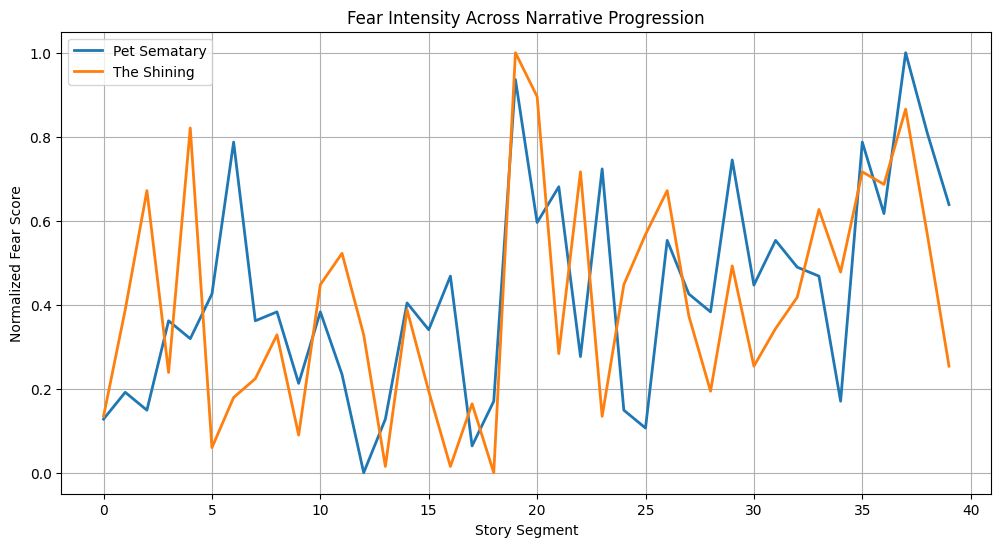

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pet_norm, label="Pet Sematary", linewidth=2)
plt.plot(shining_norm, label="The Shining", linewidth=2)

plt.title("Fear Intensity Across Narrative Progression")
plt.xlabel("Story Segment")
plt.ylabel("Normalized Fear Score")
plt.legend()
plt.grid(True)
plt.show()

# 🧠 Interpretation

### **Pet Sematary**
- Sharp spikes of fear  
- Family-loss language strongly affects fear scores  
- More sudden and traumatic fear moments  

### **The Shining**
- Slow, steady psychological escalation  
- Heavy use of ambient fear (silence, shadows, cold)  
- Fear rises with Jack’s mental deterioration  

### **Conclusion**
The custom lexicon reveals **different fear strategies**:
- *Pet Sematary* → visceral trauma  
- *The Shining* → psychological erosion  

This supports the “Language of Fear” theme for our NLP project.
